In [30]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
%matplotlib inline

p = sns.color_palette()

os.listdir('./')

seed = 42

In [6]:
for d in os.listdir('./sample_images'):
    if '.DS_Store' not in d:
        print("Patient '{}' has {} scans".format(d, len(os.listdir('./sample_images/' + d))))
print('----')
print('Total patients {} Total DCM files {}'.format(len(os.listdir('./sample_images')), 
                                                      len(glob.glob('./sample_images/*/*.dcm'))))

Patient '00cba091fa4ad62cc3200a657aeb957e' has 134 scans
Patient '0a099f2549429d29b32f349e95fb2244' has 128 scans
Patient '0a0c32c9e08cc2ea76a71649de56be6d' has 133 scans
Patient '0a38e7597ca26f9374f8ea2770ba870d' has 110 scans
Patient '0acbebb8d463b4b9ca88cf38431aac69' has 203 scans
Patient '0b20184e0cd497028bdd155d9fb42dc9' has 196 scans
Patient '0bd0e3056cbf23a1cb7f0f0b18446068' has 280 scans
Patient '0c0de3749d4fe175b7a5098b060982a1' has 123 scans
Patient '0c37613214faddf8701ca41e6d43f56e' has 164 scans
Patient '0c59313f52304e25d5a7dcf9877633b1' has 244 scans
Patient '0c60f4b87afcb3e2dfa65abbbf3ef2f9' has 136 scans
Patient '0c98fcb55e3f36d0c2b6507f62f4c5f1' has 180 scans
Patient '0c9d8314f9c69840e25febabb1229fa4' has 221 scans
Patient '0ca943d821204ceb089510f836a367fd' has 147 scans
Patient '0d06d764d3c07572074d468b4cff954f' has 435 scans
Patient '0d19f1c627df49eb223771c28548350e' has 183 scans
Patient '0d2fcf787026fece4e57be167d079383' has 126 scans
Patient '0d941a3ad6c889ac451caf

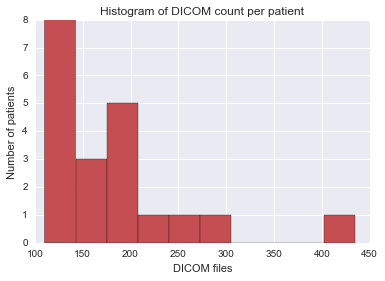

In [7]:
patient_sizes = [len(os.listdir('./sample_images/' + d)) for d in os.listdir('./sample_images') if '.DS_Store' not in d]
plt.hist(patient_sizes, color=p[2])
plt.ylabel('Number of patients')
plt.xlabel('DICOM files')
plt.title('Histogram of DICOM count per patient')

# Training Set

In [8]:
df_train = pd.read_csv('./stage1_labels.csv')
df_train.head()

,id,cancer
0,0015ceb851d7251b8f399e39779d1e7d,1
1,0030a160d58723ff36d73f41b170ec21,0
2,003f41c78e6acfa92430a057ac0b306e,0
3,006b96310a37b36cccb2ab48d10b49a3,1
4,008464bb8521d09a42985dd8add3d0d2,1


In [9]:
print('Number of training patients: {}'.format(len(df_train)))
print('Cancer rate: {:.4}%'.format(df_train.cancer.mean()*100))

Number of training patients: 1397
Cancer rate: 25.91%


# Naive Submission
Since the evaluation metric used in this competition is LogLoss and not something like AUC, this means that we can often gain an improvement just by aligning the probabilities of our sample submission to that of the training set.
Before I try making a naive submission, I will calculate what the score of this submission would be on the training set to get a comparison.

In [10]:
from sklearn.metrics import log_loss
logloss = log_loss(df_train.cancer, np.zeros_like(df_train.cancer) + df_train.cancer.mean())
print('Training logloss is {}'.format(logloss))

Training logloss is 0.572141489479


In [11]:
# sample = pd.read_csv('./stage1_sample_submission.csv')
# sample['cancer'] = df_train.cancer.mean()
# sample.to_csv('naive_submission.csv', index=False)

# Looking at images

In [12]:
import dicom

In [13]:
dcm = './0a67f9edb4915467ac16a565955898d3.dcm'
print('Filename: {}'.format(dcm))
dcm = dicom.read_file(dcm)

Filename: ./0a67f9edb4915467ac16a565955898d3.dcm


In [14]:
print dcm

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.840.113654.2.55.240087524148038410985780799448670801102
(0008, 0060) Modality                            CS: 'CT'
(0008, 103e) Series Description                  LO: 'Axial'
(0010, 0010) Patient's Name                      PN: '0a0c32c9e08cc2ea76a71649de56be6d'
(0010, 0020) Patient ID                          LO: '0a0c32c9e08cc2ea76a71649de56be6d'
(0010, 0030) Patient's Birth Date                DA: '19000101'
(0018, 0060) KVP                                 DS: ''
(0020, 000d) Study Instance UID                  UI: 2.25.60037070027156423276159501017920151735078954137544798194660
(0020, 000e) Series Instance UID                 UI: 2.25.58703274222857573910779974742342423982066946347485459782406
(0020, 0011) Series Number                       IS: '1'
(0020, 0012) Acquisition Number            

-93.410004
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


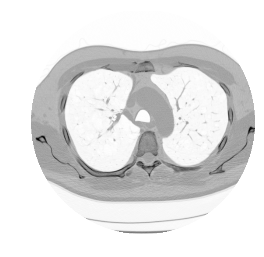

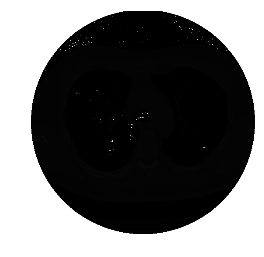

In [15]:
img = dcm.pixel_array
print dcm.SliceLocation  
img[img == -2000] = 0
print img

plt.axis('off')
plt.imshow(img)
plt.show()

plt.axis('off')
plt.imshow(-img) # Invert colors with -
plt.show()

In [16]:
labels = pd.read_csv('stage1_labels.csv')
print labels.head()

                                 id  cancer
0  0015ceb851d7251b8f399e39779d1e7d       1
1  0030a160d58723ff36d73f41b170ec21       0
2  003f41c78e6acfa92430a057ac0b306e       0
3  006b96310a37b36cccb2ab48d10b49a3       1
4  008464bb8521d09a42985dd8add3d0d2       1


In [17]:
# import csv
# features = open('features.csv', 'wb')
# wr = csv.writer(features)

In [39]:
a = []
b = []
ids = []
imgs = []
for i in os.listdir('./sample_images/'):
    if '.DS_Store' not in i and '0b20184e0cd497028bdd155d9fb42dc9' not in i:
        print "starting with new patient", i
        label = int(labels[labels['id'] == i]['cancer'])
#         print label
        for j in os.listdir('./sample_images/'+i):
            ids.append(i)
            imgs.append(j)
            b.append(label)
            dcm = dicom.read_file('./sample_images/'+i+'/'+j)
            img = dcm.pixel_array
            img[img == -2000] = 0
            img = np.sum(img, axis=1) ## sum of each row
#             print img.shape
            img = list(img.flatten())
            loca = float(dcm.SliceLocation)
            img.extend([loca])
            a.append(img)

#             break
#         break
df = pd.DataFrame()
df['id'] = ids
df['image'] = imgs
df['label'] = b
df['feat'] = a

X = a
Y = b 

starting with new patient 00cba091fa4ad62cc3200a657aeb957e
starting with new patient 0a099f2549429d29b32f349e95fb2244
starting with new patient 0a0c32c9e08cc2ea76a71649de56be6d
starting with new patient 0a38e7597ca26f9374f8ea2770ba870d
starting with new patient 0acbebb8d463b4b9ca88cf38431aac69
starting with new patient 0bd0e3056cbf23a1cb7f0f0b18446068
starting with new patient 0c0de3749d4fe175b7a5098b060982a1
starting with new patient 0c37613214faddf8701ca41e6d43f56e
starting with new patient 0c59313f52304e25d5a7dcf9877633b1
starting with new patient 0c60f4b87afcb3e2dfa65abbbf3ef2f9
starting with new patient 0c98fcb55e3f36d0c2b6507f62f4c5f1
starting with new patient 0c9d8314f9c69840e25febabb1229fa4
starting with new patient 0ca943d821204ceb089510f836a367fd
starting with new patient 0d06d764d3c07572074d468b4cff954f
starting with new patient 0d19f1c627df49eb223771c28548350e
starting with new patient 0d2fcf787026fece4e57be167d079383
starting with new patient 0d941a3ad6c889ac451caf89c46cb9

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score


In [41]:
# df = pd.read_csv('./features.csv')
# X = np.arrray(df)
print len(df)

3408


In [89]:
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.50, random_state=seed)

patients = [i for i in os.listdir('./sample_images/') if '.DS_Store' not in i]
print len(patients)
patients_train = np.random.choice(patients, 15)

X_train = []
y_train = []
X_test = []
y_test = []

for i in range(len(df)):
    if df['id'][i] in patients_train:
        X_train.append(np.array(df['feat'][i]))
        y_train.append(df['label'][i])
    else:
        X_test.append(np.array(df['feat'][i]))
        y_test.append(df['label'][i])


20


In [90]:
model = RandomForestClassifier(random_state=seed)
model.fit(X_train, y_train)
predicted = model.predict(X_test)
predicted_prob = model.predict_proba(X_test)
# print 'log loss', log_loss(y_test, predicted)
print 'accuracy score', accuracy_score(y_test, predicted)

print predicted, y_test, X[0]

accuracy score 0.573326248672
[0 0 0 ..., 0 0 1] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [72]:
# sample = pd.read_csv('./stage1_sample_submission.csv')
# test_ids = sample['id']
# print test_ids
# print np.sum(predicted_prob)
# predicted = model.predict(X_test)
# sample['cancer'] = 
# sample.to_csv('submission2.csv', index=False)


In [40]:
df.head(10)

,id,image,label,feat
0,00cba091fa4ad62cc3200a657aeb957e,034673134cbef5ea15ff9e0c8090500a.dcm,0,"[1476, 1960, 2412, 2828, 3179, 3491, 3766, 397..."
1,00cba091fa4ad62cc3200a657aeb957e,0484f5a7f55eb7b6743cadaffcce586d.dcm,0,"[1208, 1630, 2088, 2464, 2663, 3042, 3307, 355..."
2,00cba091fa4ad62cc3200a657aeb957e,053a0460fb45227bd8e0e7b514a71e8e.dcm,0,"[1318, 1700, 2176, 2641, 2930, 3107, 3308, 366..."
3,00cba091fa4ad62cc3200a657aeb957e,0678ae61b7c56dfaf35477f6d01a6ffc.dcm,0,"[1426, 1894, 2428, 2789, 3061, 3444, 3835, 397..."
4,00cba091fa4ad62cc3200a657aeb957e,06ba0baeb0f26fb7aed5249eebbb77a9.dcm,0,"[1376, 2032, 2398, 2750, 3256, 4247, 5684, 736..."
5,00cba091fa4ad62cc3200a657aeb957e,0791f624c2f313bfe490ac940947977e.dcm,0,"[1292, 1842, 2274, 2495, 2887, 3180, 3346, 347..."
6,00cba091fa4ad62cc3200a657aeb957e,08eb3a007acc90a45b6e1b92fb479adc.dcm,0,"[1260, 1786, 2004, 2411, 2659, 2836, 3144, 338..."
7,00cba091fa4ad62cc3200a657aeb957e,090173a7ed57a872b62fd7c0b1d24be5.dcm,0,"[1200, 1710, 1908, 2231, 2570, 2875, 3129, 332..."
8,00cba091fa4ad62cc3200a657aeb957e,0a291d1b12b86213d813e3796f14b329.dcm,0,"[1194, 1836, 2036, 2313, 2623, 2952, 3135, 331..."
9,00cba091fa4ad62cc3200a657aeb957e,0af07f64d14d6b0451036cc742a96fbf.dcm,0,"[1130, 1550, 1974, 2153, 2566, 2883, 2988, 325..."
